# Linear Transformations

In this lab you will explore linear transformations, visualize their results and master matrix multiplication to apply various linear transformations.

# Table of Contents
- [ 1 - Transformations](#1)
- [ 2 - Linear Transformations](#2)
- [ 3 - Transformations Defined as a Matrix Multiplication](#3)
- [ 4 - Standard Transformations in a Plane](#4)
  - [ 4.1 - Example 1: Horizontal Scaling (Dilation)](#4.1)
  - [ 4.2 - Example 2: Reflection about y-axis (the vertical axis)](#4.2)
- [ 5 - Application of Linear Transformations: Computer Graphics](#5)

## Packages

Run the following cell to load the package you'll need.

In [ ]:
import numpy as np
# OpenCV library for image transformations.
import cv2

<a name='1'></a>
## 1 - Transformations

A **transformation** is a function from one vector space to another that respects the underlying (linear) structure of each vector space. Referring to a specific transformation, you can use a symbol, such as $T$. Specifying the spaces containing the input and output vectors, e.g. $\mathbb{R}^2$ and $\mathbb{R}^3$, you can write $T: \mathbb{R}^2 \rightarrow \mathbb{R}^3$. Transforming vector $v \in \mathbb{R}^2$ into the vector $w\in\mathbb{R}^3$ by the transformation $T$, you can use the notation $T(v)=w$ and read it as "*T of v equals to w*" or "*vector w is an **image** of vector v with the transformation T*".

The following Python function corresponds to the transformation $T: \mathbb{R}^2 \rightarrow \mathbb{R}^3$ with the following symbolic formula:

$$T\begin{pmatrix}
          \begin{bmatrix}
           v_1 \\           
           v_2
          \end{bmatrix}\end{pmatrix}=
          \begin{bmatrix}
           3v_1 \\
           0 \\
           -2v_2
          \end{bmatrix}
          \tag{1}
          $$

In [ ]:
def T(v):
    w = np.zeros((3,1))
    w[0,0] = 3*v[0,0]
    w[2,0] = -2*v[1,0]
    
    return w

v = np.array([[3], [5]])
w = T(v)

print("Original vector:\n", v, "\n\n Result of the transformation:\n", w)

<a name='2'></a>
## 2 - Linear Transformations

A transformation $T$ is said to be **linear** if the following two properties are true for any scalar $k$, and any input vectors $u$ and $v$:

1. $T(kv)=kT(v)$,
2. $T(u+v)=T(u)+T(v)$.

In the example above $T$ is a linear transformation:

$$T (kv) =
          T \begin{pmatrix}\begin{bmatrix}
          kv_1 \\
          kv_2
          \end{bmatrix}\end{pmatrix} = 
          \begin{bmatrix}
           3kv_1 \\
           0 \\
           -2kv_2
          \end{bmatrix} =
          k\begin{bmatrix}
           3v_1 \\
           0 \\
           -2v_2
          \end{bmatrix} = 
          kT(v),\tag{2}$$
          
$$T (u+v) =
          T \begin{pmatrix}\begin{bmatrix}
          u_1 + v_1 \\
          u_2 + v_2
          \end{bmatrix}\end{pmatrix} = 
          \begin{bmatrix}
           3(u_1+v_1) \\
           0 \\
           -2(u_2+v_2)
          \end{bmatrix} = 
          \begin{bmatrix}
           3u_1 \\
           0 \\
           -2u_2
          \end{bmatrix} +
          \begin{bmatrix}
           3v_1 \\
           0 \\
           -2v_2
          \end{bmatrix} = 
          T(u)+T(v).\tag{3}$$

You can change the values of $k$ or vectors $u$ and $v$ in the cell below, to check that this is true for some specific values.

In [ ]:
u = np.array([[1], [-2]])
v = np.array([[2], [4]])

k = 7

print("T(k*v):\n", T(k*v), "\n k*T(v):\n", k*T(v), "\n\n")
print("T(u+v):\n", T(u+v), "\n T(u)+T(v):\n", T(u)+T(v))

Some examples of linear transformations are rotations, reflections, scaling (dilations), etc. In this lab you will explore a few of them.

<a name='3'></a>
## 3 - Transformations Defined as a Matrix Multiplication

Let $L: \mathbb{R}^m \rightarrow \mathbb{R}^n$ be defined by a matrix $A$, where $L(v)=Av$, multiplication of the matrix $A$ ($n\times m$) and vector $v$ ($m\times 1$) resulting in the vector $w$ ($n\times 1$).

Now try to guess, what should be the elements of matrix $A$, corresponding to the transformation $L: \mathbb{R}^2 \rightarrow \mathbb{R}^3$:

$$L\begin{pmatrix}
          \begin{bmatrix}
           v_1 \\           
           v_2
          \end{bmatrix}\end{pmatrix}=
          \begin{bmatrix}
           3v_1 \\
           0 \\
           -2v_2
          \end{bmatrix}=
          \begin{bmatrix}
           ? & ? \\
           ? & ? \\
           ? & ?
          \end{bmatrix}
          \begin{bmatrix}
           v_1 \\
           v_2
          \end{bmatrix}
          \tag{4}
          $$

To do that, write the transformation $L$ as $Av$ and then perform matrix multiplication:
    $$L\begin{pmatrix}
          \begin{bmatrix}
           v_1 \\           
           v_2
          \end{bmatrix}\end{pmatrix}=
          A\begin{bmatrix}
           v_1 \\           
           v_2
          \end{bmatrix}=
          \begin{bmatrix}
           a_{1,1} & a_{1,2} \\
           a_{2,1} & a_{2,2} \\
           a_{3,1} & a_{3,2}
          \end{bmatrix}
          \begin{bmatrix}
           v_1 \\           
           v_2
          \end{bmatrix}=
          \begin{bmatrix}
           a_{1,1}v_1+a_{1,2}v_2 \\
           a_{2,1}v_1+a_{2,2}v_2 \\
           a_{3,1}v_1+a_{3,2}v_2 \\
          \end{bmatrix}=
          \begin{bmatrix}
           3v_1 \\
           0 \\
           -2v_2
          \end{bmatrix}\tag{5}
          $$
          
Can you see now what should be the values of the elements $a_{i,j}$ of matrix $A$ to make the equalities $(5)$ correct? Find out the answer in the following code cell:

In [ ]:
def L(v):
    A = np.array([[3,0], [0,0], [0,-2]])
    print("Transformation matrix:\n", A, "\n")
    w = A @ v
    
    return w

v = np.array([[3], [5]])
w = L(v)

print("Original vector:\n", v, "\n\n Result of the transformation:\n", w)

Every linear transformation can be carried out by matrix multiplication. And vice versa, carrying out matrix multiplication, it is natural to consider the linear transformation that it represents. It means you can associate the matrix with the linear transformation in some way. This is a key connection between linear transformations and matrix algebra.

<a name='4'></a>
## 4 - Standard Transformations in a Plane

As discussed above in section [3](#3), a linear transformation $L: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ can be represented as a multiplication of a $2 \times 2$ matrix and a coordinate vector $v\in\mathbb{R}^2.$ Note that so far you have been using some random vector $v\in\mathbb{R}^2.$ (e.g. $v=\begin{bmatrix}3 \\ 5\end{bmatrix}$). To have a better intuition of what the transformation is really doing in the $\mathbb{R}^2$ space, it is wise to choose vector $v$ in a less random way. 

A good choice would be vectors of a standard basis $e_1=\begin{bmatrix}1 \\ 0\end{bmatrix}$ and $e_2=\begin{bmatrix}0 \\ 1\end{bmatrix}$. Let's apply linear transformation $L$ to each of the vectors $e_1$ and $e_2$: $L(e_1)=Ae_1$ and $L(e_2)=Ae_2$. If you put vectors $\{e_1, e_2\}$ into columns of a matrix and perform matrix multiplication

$$A\begin{bmatrix}e_1 & e_2\end{bmatrix}=\begin{bmatrix}Ae_1 & Ae_2\end{bmatrix}=\begin{bmatrix}L(e_1) & L(e_2)\end{bmatrix},\tag{3}$$

you can note that $\begin{bmatrix}e_1 & e_2\end{bmatrix}=\begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix}$ (identity matrix). Thus, $A\begin{bmatrix}e_1 & e_2\end{bmatrix} = AI=A$, and

$$A=\begin{bmatrix}L(e_1) & L(e_2)\end{bmatrix}.\tag{4}$$

This is a matrix with the columns that are the images of the vectors of the standard basis. 

This choice of vectors \{$e_1, e_2$\} provides opportunity for the visual representation of the linear transformation $L$ (you will see the examples below).

<a name='4.1'></a>
### 4.1 - Example 1: Horizontal Scaling (Dilation)

Horizontal scaling (factor $2$ in this example) can be defined considering transformation of a vector $e_1=\begin{bmatrix}1 \\ 0\end{bmatrix}$ into a vector $\begin{bmatrix}2 \\ 0\end{bmatrix}$ and leaving vector $e_2=\begin{bmatrix}0 \\ 1\end{bmatrix}$ without any changes. The following function `T_hscaling()` corresponds to the horizontal scaling (factor $2$) of a vector. The second function `transform_vectors()` applies defined transformation to a set of vectors (here two vectors).

In [ ]:
def T_hscaling(v):
    A = np.array([[2,0], [0,1]])
    w = A @ v
    
    return w
    
    
def transform_vectors(T, v1, v2):
    V = np.hstack((v1.reshape(2,1), v2.reshape(2,1)))
    W = T(V)
    
    return W
    
e1 = np.array([[1], [0]])
e2 = np.array([[0], [1]])

transformation_result_hscaling = transform_vectors(T_hscaling, e1, e2)

print("Original vectors:\n e1= \n", e1, "\n e2=\n", e2, 
      "\n\n Result of the transformation (matrix form):\n", transformation_result_hscaling)

You can get a visual understanding of the transformation, producing a plot which displays input vectors, and their transformations. Do not worry if the code in the following cell will not be clear - at this stage this is not important code to understand.

In [ ]:
import matplotlib.pyplot as plt

def plot_transformation(T, e1, e2):
    color_original = "#129cab"
    color_transformed = "#cc8933"
    
    _, ax = plt.subplots(figsize=(7, 7))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-5, 5))
    ax.set_yticks(np.arange(-5, 5))
    
    plt.axis([-5, 5, -5, 5])
    plt.quiver([0, 0],[0, 0], [e1[0], e2[0]], [e1[1], e2[1]], color=color_original, angles='xy', scale_units='xy', scale=1)
    plt.plot([0, e2[0], e1[0], e1[0]], 
             [0, e2[1], e2[1], e1[1]], 
             color=color_original)
    e1_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e1)], dtype=object)
    ax.text(e1[0]-0.2+e1_sgn[0], e1[1]-0.2+e1_sgn[1], f'$e_1$', fontsize=14, color=color_original)
    e2_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e2)], dtype=object)
    ax.text(e2[0]-0.2+e2_sgn[0], e2[1]-0.2+e2_sgn[1], f'$e_2$', fontsize=14, color=color_original)
    
    e1_transformed = T(e1)
    e2_transformed = T(e2)
    
    plt.quiver([0, 0],[0, 0], [e1_transformed[0], e2_transformed[0]], [e1_transformed[1], e2_transformed[1]], 
               color=color_transformed, angles='xy', scale_units='xy', scale=1)
    plt.plot([0,e2_transformed[0], e1_transformed[0]+e2_transformed[0], e1_transformed[0]], 
             [0,e2_transformed[1], e1_transformed[1]+e2_transformed[1], e1_transformed[1]], 
             color=color_transformed)
    e1_transformed_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e1_transformed)], dtype=object)
    ax.text(e1_transformed[0]-0.2+e1_transformed_sgn[0], e1_transformed[1]-e1_transformed_sgn[1], 
            f'$T(e_1)$', fontsize=14, color=color_transformed)
    e2_transformed_sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(e2_transformed)], dtype=object)
    ax.text(e2_transformed[0]-0.2+e2_transformed_sgn[0], e2_transformed[1]-e2_transformed_sgn[1], 
            f'$T(e_2)$', fontsize=14, color=color_transformed)
    
    plt.gca().set_aspect("equal")
    plt.show()
    
plot_transformation(T_hscaling, e1, e2)

You can observe that the polygon has been stretched in the horizontal direction as a result of the transformation.

<a name='4.2'></a>
### 4.2 - Example 2: Reflection about y-axis (the vertical axis)

Function `T_reflection_yaxis()` defined below corresponds to the reflection about y-axis:

In [ ]:
def T_reflection_yaxis(v):
    A = np.array([[-1,0], [0,1]])
    w = A @ v
    
    return w
    
e1 = np.array([[1], [0]])
e2 = np.array([[0], [1]])

transformation_result_reflection_yaxis = transform_vectors(T_reflection_yaxis, e1, e2)

print("Original vectors:\n e1= \n", e1,"\n e2=\n", e2, 
      "\n\n Result of the transformation (matrix form):\n", transformation_result_reflection_yaxis)

You can visualize this transformation:

In [ ]:
plot_transformation(T_reflection_yaxis, e1, e2)

There are many more standard linear transformations to explore. But now you have the required tools to apply them and visualize the results.

<a name='5'></a>
## 5 - Application of Linear Transformations: Computer Graphics

A large number of basic geometric shapes is used in computer graphics. Such shapes (e.g. triangles, quadrilaterals) are defined by their vertexes (corners). Linear transformations are often used to generate complex shapes from the basic ones, though scaling, reflection, rotation, shearing etc. It provides opportunity to manipulate those shapes efficiently. 

The software responsible for rendering of a graphics, has to process the coordinates of millions of vertexes. The use of matrix multiplication to manipulate coordinates helps to merge multiple transformations together, just applying matrix multiplication one by one in a sequence. And another advantage is that the dedicated hardware, such as Graphics Processing Units (GPUs), is designed specifically to handle these calculations in large numbers with high speed.

So, matrix multiplication and linear transformations give you a super power, especially on scale!

Here is an example where linear transformations could have helped to reduce the amount of work preparing the image:

<div>
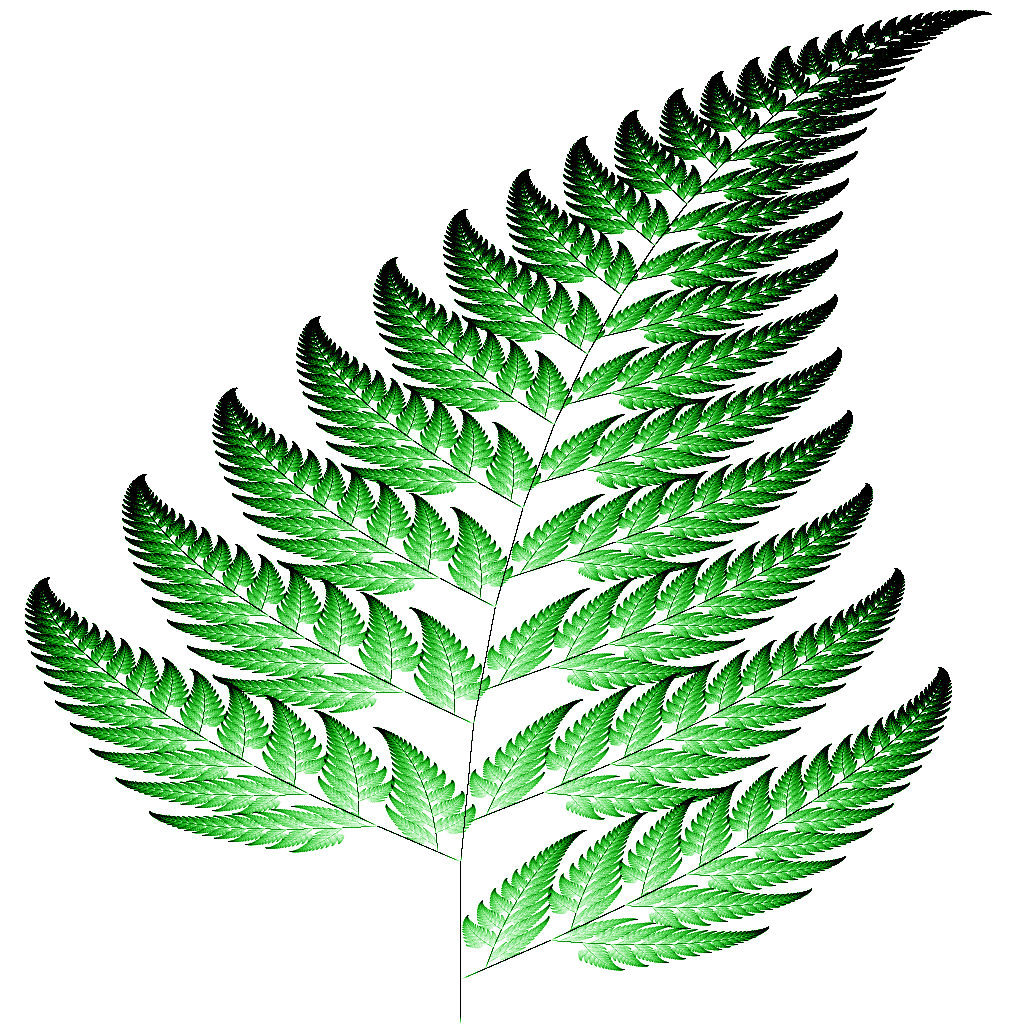
</div>


All of the subleafs are similar and can be prepared as just linear transformations of one original leaf.

Let's see a simple example of two transformations applied to a leaf image. For the image transformations you can use an `OpenCV` library. First, upload and show the image:

In [ ]:
img = cv2.imread('Images/leaf_original.png', 0)
plt.imshow(img)

Of course, this is just a very simple leaf image (not a real example in preparation of the proper art work), but it will help you to get the idea how a few transformations can be applied in a row. Try to rotate the image 90 degrees clockwise and then apply a shear transformation, which can be visualized as:

<div>
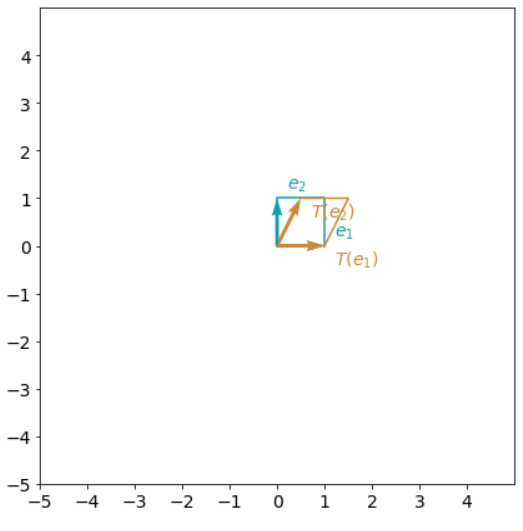
</div>

Rotate the image:

In [ ]:
image_rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

plt.imshow(image_rotated)

Applying the shear you will get the following output:

In [ ]:
rows,cols = image_rotated.shape
# 3 by 3 matrix as it is required for the OpenCV library, don't worry about the details of it for now.
M = np.float32([[1, 0.5, 0], [0, 1, 0], [0, 0, 1]])
image_rotated_sheared = cv2.warpPerspective(image_rotated, M, (int(cols), int(rows)))
plt.imshow(image_rotated_sheared)

What if you will apply those two transformations in the opposite order? Do you think the result will be the same? Run the following code to check that:

In [ ]:
image_sheared = cv2.warpPerspective(img, M, (int(cols), int(rows)))
image_sheared_rotated = cv2.rotate(image_sheared, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(image_sheared_rotated)

Comparing last two images, you can clearly see that the outputs are different. This is because linear transformation can be defined as a matrix multiplication. Then, applying two transformations in a row, e.g. with matrices $A$ and $B$, you perform multiplications $B(Av)=(BA)v$, where $v$ is a vector. And remember, that generally you cannot change the order in the matrix multiplication (most of the time $BA\neq AB$). Let's check that! Define two matrices, corresponding to the rotation and shear transformations:

In [ ]:
M_rotation_90_clockwise = np.array([[0, 1], [-1, 0]])
M_shear_x = np.array([[1, 0.5], [0, 1]])

print("90 degrees clockwise rotation matrix:\n", M_rotation_90_clockwise)
print("Matrix for the shear along x-axis:\n", M_shear_x)

Now check that the results of their multiplications `M_rotation_90_clockwise @ M_shear_x` and `M_shear_x @ M_rotation_90_clockwise` are different:

In [ ]:
print("M_rotation_90_clockwise by M_shear_x:\n", M_rotation_90_clockwise @ M_shear_x)
print("M_shear_x by M_rotation_90_clockwise:\n", M_shear_x @ M_rotation_90_clockwise)

This simple example shows that you need to be aware of the mathematical objects and their properties in the applications.

Congratulations on completing this lab!

***
This lab is based on the [Mathematics for Machine Learning and Data Science Specialization](https://www.deeplearning.ai/courses/mathematics-for-machine-learning-and-data-science-specialization/) from Deeplearning.AI